In [61]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarning caused by Pandas v2.1.0
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_theme()
movies_df = pd.read_csv('movies.csv')

AWARD_WINS = 'Award Wins'
TOTALS = r'Total Awards and Nominations'
AWARD_NOMS = 'Award Nominations'
OSCAR_WINS = 'Oscar Wins'
BOX_OFFICE = 'Box Office in Millions'

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 1/4</small>
### What was the runtime for each movie?

I loaded the dataset and identified the relevant columns: "Movie Title" and "Runtime". Considering the text length of the titles compared to the runtime, I chose to go with a horizontal bar chart. I sorted the data by runtime and then plotted the data. Shindler's List was the longest movie at 195 minutes and The Artist was the shortest at 100 minutes.

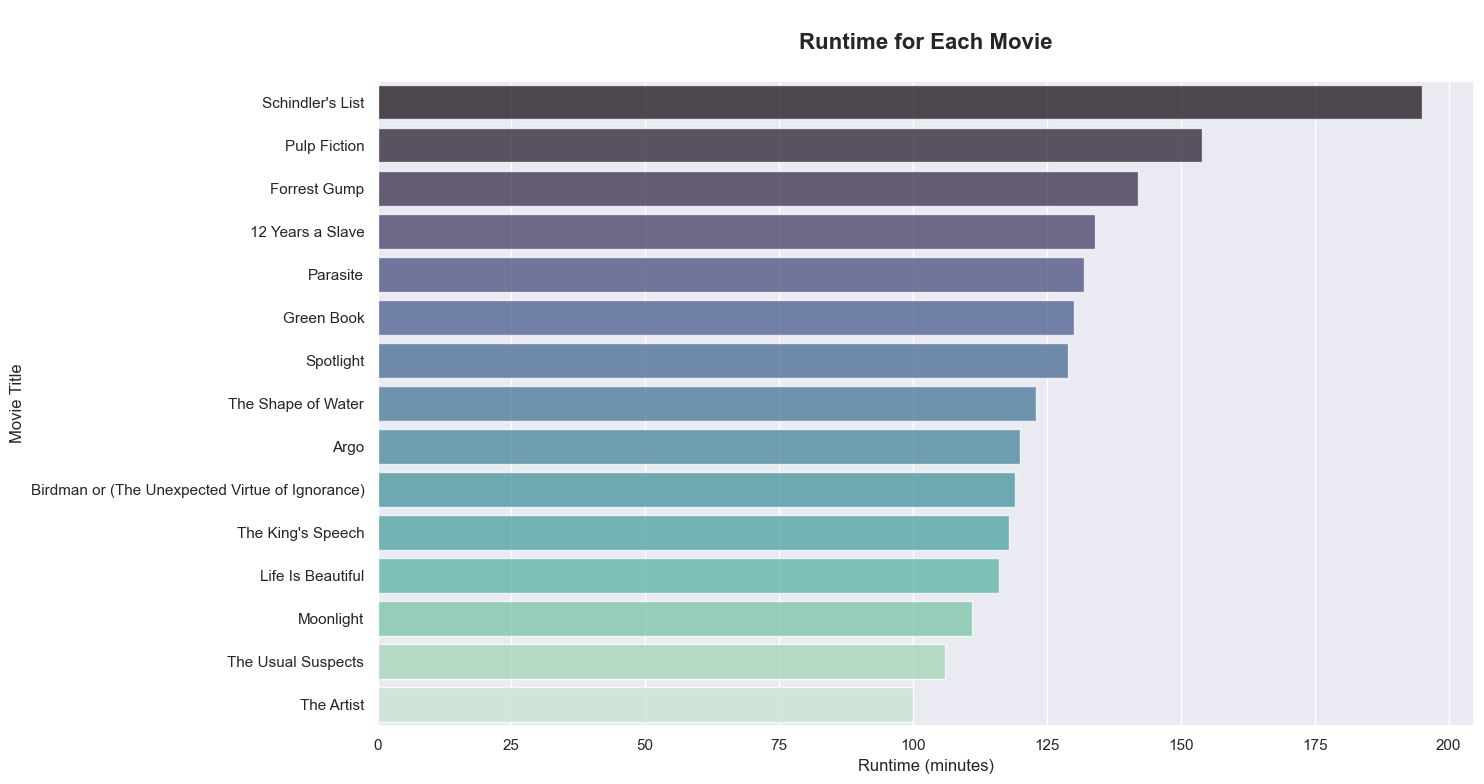

In [62]:
sorted_movies_df = movies_df.sort_values(by="Runtime", ascending=False)

plt.figure(figsize=(15, 8))
runtime_plot_sorted = sns.barplot(y="Movie Title", x="Runtime",
                                  data=sorted_movies_df,
                                  palette="mako", alpha=0.75)
plt.title('\nRuntime for Each Movie\n', fontsize=16, fontweight='bold')
plt.xlabel('Runtime (minutes)')
plt.tight_layout()
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 2/4</small>
### What movie had the longest runtime?

Based on the above horizontal bar chart, the movie with the longest runtime is **Shindler's List** at 195 minutes.

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 3/4</small>
### Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

To analyze the relationship between the movie's runtime and the number of awards it won, I created a scatter plot with "Runtime" on the x-axis and "Award Wins" on the y-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The chart shows a weak negative correlation between the movie's runtime and number of awards it won. As the runtime of a movie increases, there's a slight tendency for it to win fewer awards, but the relationship is not strong. This is a good case to demonstrate that *"correlation doesn't equal causation"*.

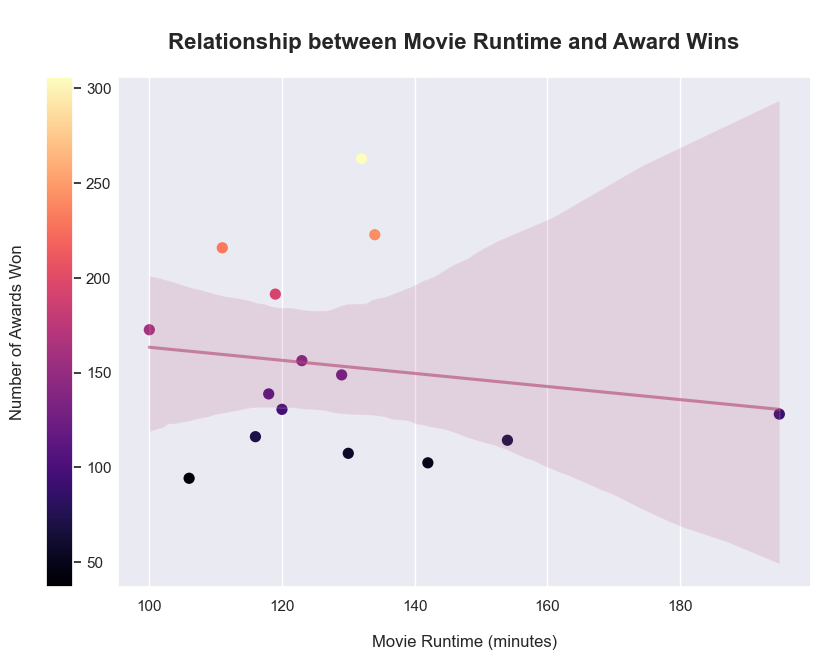

In [63]:
fig, ax = plt.subplots(figsize=(9, 6))

scatter = ax.scatter(movies_df['Runtime'], movies_df[AWARD_WINS],
                     c=movies_df[AWARD_WINS], cmap='magma', s=50)
sns.regplot(x='Runtime', y=AWARD_WINS, data=movies_df, scatter=False,
            line_kws={'color':'#B34573', 'alpha':0.6}, ax=ax)

ax.yaxis.set_visible(False)
cbar_ax = fig.add_axes([0.1, 0.1, 0.03, 0.85])
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.ax.yaxis.set_label_position('left')
cbar.set_label('Number of Awards Won', rotation=90, labelpad=15)
title_position = ax.title.get_position()
ax.set_title('\nRelationship between Movie Runtime and Award Wins',
             fontsize=16, fontweight='bold', x=title_position[0] - 0.015,
             y=title_position[1], pad=20)


ax.set_xlabel('Movie Runtime (minutes)', labelpad=15)
ax.set_position([0.18, 0.1, 0.77, 0.85])
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 4/4</small>
### How many awards and nominations did each movie receive?

The stacked bar chart below displays the total awards and nominations received by each movie. From the chart, I can see that **12 Years a Slave**(579) has the highest combined total of award wins and nominations, while **The Usual Suspects**(54) has the lowest combined total in the dataset.

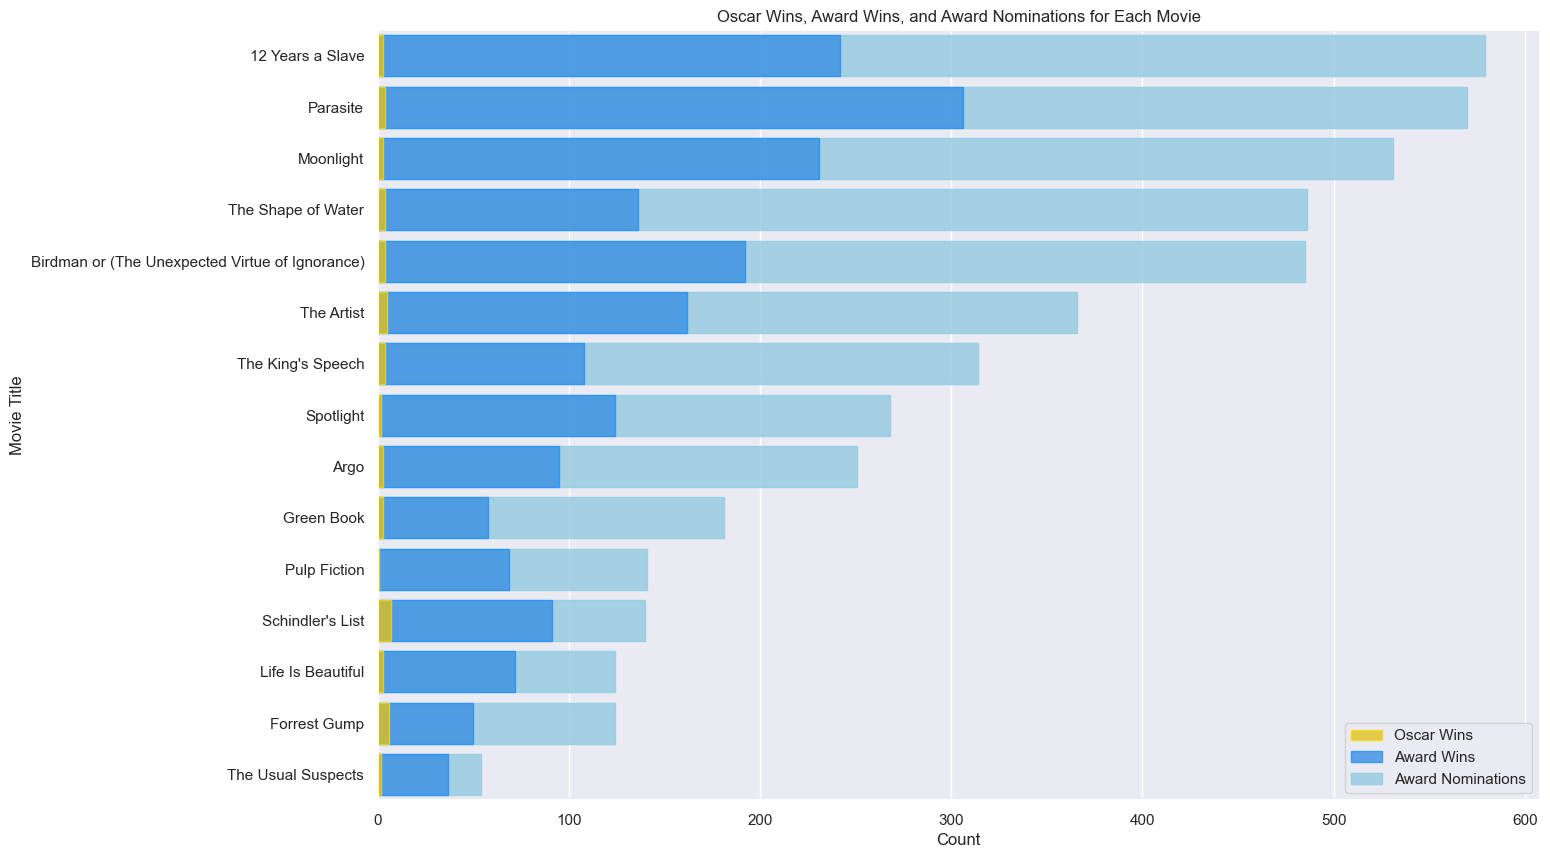

In [64]:
movies_df[TOTALS] = movies_df[AWARD_WINS] + movies_df[AWARD_NOMS]

movies_df_sorted = movies_df.sort_values(by=TOTALS, ascending=False)
plt.figure(figsize=(15, 10))
colors = ['skyblue', 'dodgerblue', 'gold']
labels = [AWARD_NOMS, AWARD_WINS, OSCAR_WINS]
cols = [TOTALS, AWARD_WINS, OSCAR_WINS]

for col, color, label in zip(cols, colors, labels):
    sns.barplot(data=movies_df_sorted, y='Movie Title', x=col, color=color,
                label=label, edgecolor=color, alpha=0.8)

plt.xlabel('Count')
plt.ylabel('Movie Title')
plt.title('Oscar Wins, Award Wins, and Award Nominations for Each Movie')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="lower right")
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 1/4</small>
### Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

To analyze the relationship between box office earnings and total nominations, I created a scatter plot with "Box Office Earnings" on the y-axis and "Total Nominations" on the x-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The chart indicates a weak negative linear relationship between total nominations and box office earnings. As the number of total nominations for a movie increases, its box office earnings tend to decrease slightly. The movie Forrest Gump is a significant outlier with much higher box office earnings than the other movies in the dataset, which may be slightly skewing the correlation.

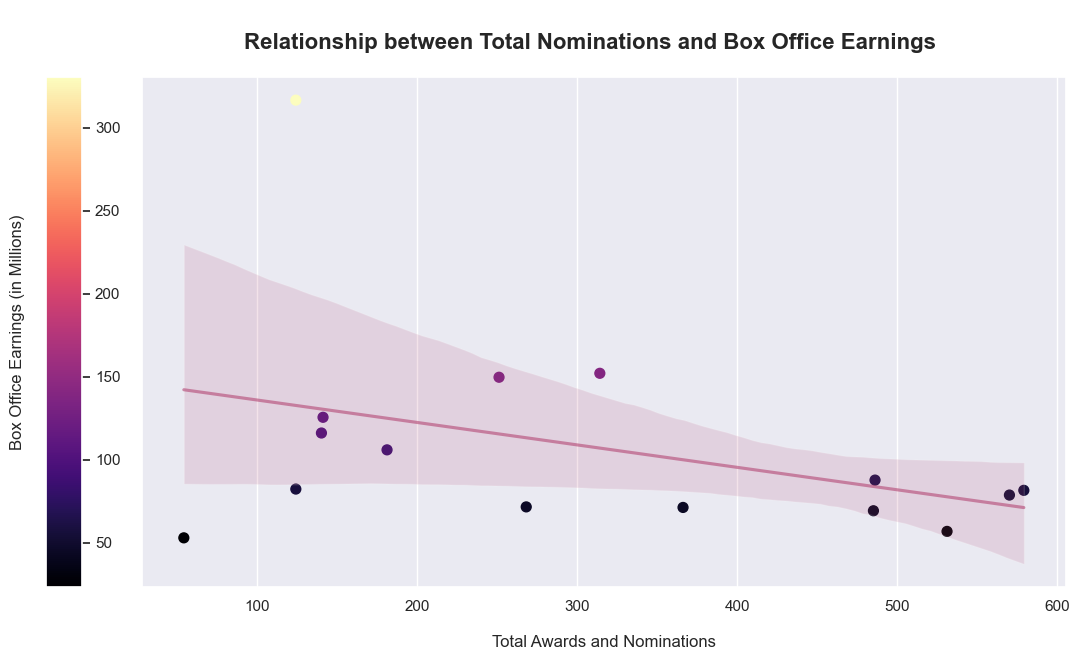

In [65]:

movies_df[BOX_OFFICE] = movies_df['Box Office'] / 1000000
movies_df[TOTALS] = movies_df[AWARD_WINS] + movies_df[AWARD_NOMS]

fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(movies_df[TOTALS], movies_df[BOX_OFFICE],
                     c=movies_df[BOX_OFFICE], cmap='magma', s=50)
sns.regplot(x=TOTALS, y=BOX_OFFICE, data=movies_df, scatter=False,
            line_kws={'color':'#B34573', 'alpha':0.6}, ax=ax)

ax.yaxis.set_visible(False)
cbar_ax = fig.add_axes([0.1, 0.1, 0.03, 0.85])
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.ax.yaxis.set_label_position('left')
cbar.set_label('Box Office Earnings (in Millions)', rotation=90, labelpad=15)
title_position = ax.title.get_position()
ax.set_title('\nRelationship between Total Nominations and Box Office Earnings',
             fontsize=16, fontweight='bold', x=title_position[0] - 0.015,
             y=title_position[1], pad=20)
ax.set_xlabel(TOTALS, labelpad=15)
ax.set_position([0.18, 0.1, 0.77, 0.85])
plt.show()
